# 順序統計量

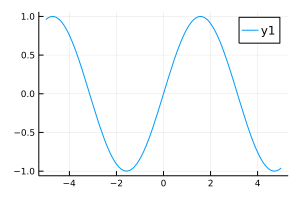

In [1]:
using Distributions
using StatsPlots
using Random
using SpecialFunctions
using StatsBase: ecdf

default(fmt=:png, size=(400, 300), titlefontsize=10, tickfontsize=6)
plot(sin; size=(300, 200))

In [2]:
ordstat!(dist, X) = sort!(rand!(dist, X))
ordstat(dist, n) = sort(rand(dist, n))

cdfordstat_old(dist, n, k, x) = ccdf(Binomial(n, cdf(dist, x)), k-1)
cdfordstat(dist, n, k, x) = cdf(Beta(k, n-k+1), cdf(dist, x))

pdfordstat(dist, n, k, x) = pdf(Beta(k, n-k+1), cdf(dist, x)) * pdf(dist, x)

pdfordstat (generic function with 1 method)

In [3]:
x = range(-5, 5, 100)
(cdfordstat_old.(Normal(), 10, 3, x) .≈ cdfordstat.(Normal(), 10, 3, x)) |> all

true

In [4]:
function plot_ordstat(dist, n, k, a, b; L=10^5, kwargs...)
    X = Vector{Float64}(undef, n)    
    Y = [ordstat!(dist, X)[k] for _ in 1:L]
    
    P = histogram(Y; norm=true, alpha=0.3, label="", kwargs...)
    plot!(x -> pdfordstat(dist, n, k, x), a, b; label="", lw=2)
    
    Q = plot(x -> ecdf(Y)(x), a, b; label="ecdf")
    plot!(x -> cdfordstat(dist, n, k, x), a, b; label="cdf", ls=:dash)
    plot!(; legend=:bottomright)
    
    plot(P, Q; size=(800, 300), layout=(1, 2))
end

plot_ordstat (generic function with 1 method)

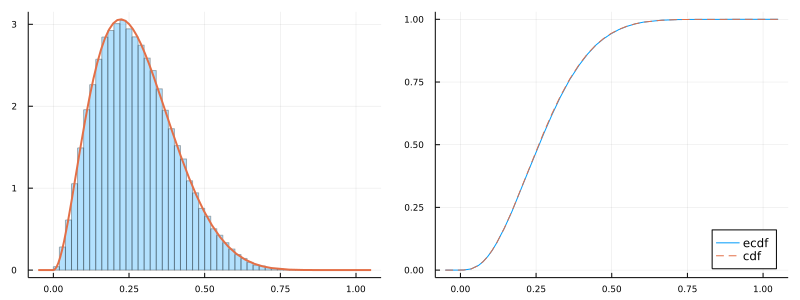

In [5]:
plot_ordstat(Uniform(0, 1), 10, 3, -0.05, 1.05; bin=50)

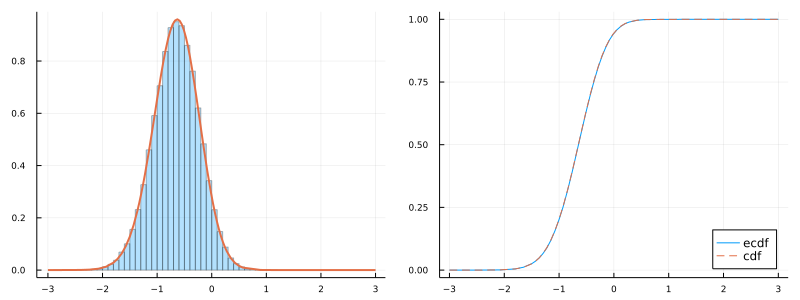

In [6]:
plot_ordstat(Normal(), 10, 3, -3, 3; bin=50)

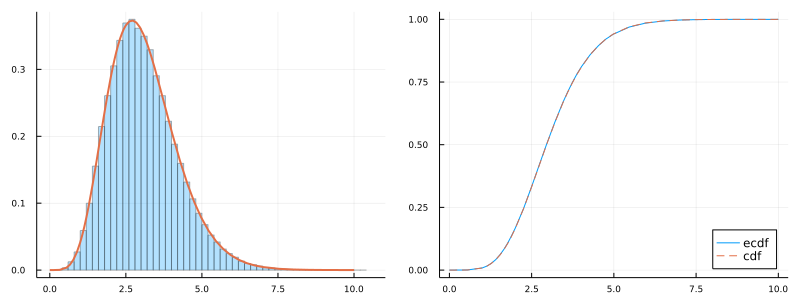

In [7]:
plot_ordstat(Gamma(2, 3), 10, 3, 0, 10; bin=50)